**Module 1: Python for Data Science**

**Case Study 1**: Inventory management


**Problem Statement:**
A small retail store is looking to manage and optimize their inventory. They want to identify 
which products are in high demand, which products are not selling. The dataset has daily sales 
data for each product.

Step 1) Data loading and cleaning




In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import re

In [124]:
data = pd.read_csv('Sales.csv')

In [125]:
data[data['Order ID']=='Order ID']= np.copy(np.nan)

In [126]:
data.dropna(inplace = True)

In [127]:
data['Order ID'] = data['Order ID'].astype(int)

In [128]:
len(data['Order ID'].unique())

9268

In [129]:
data[data['Order ID'].duplicated()]=np.copy(np.nan)

In [130]:
data.dropna(inplace = True)

In [131]:
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234.0,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235.0,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236.0,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237.0,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238.0,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
9718,150497.0,20in Monitor,1,109.99,01/26/19 19:09,"95 8th St, Dallas, TX 75001"
9719,150498.0,27in FHD Monitor,1,149.99,01/10/19 22:58,"403 7th St, San Francisco, CA 94016"
9720,150499.0,ThinkPad Laptop,1,999.99,01/21/19 14:31,"214 Main St, Portland, OR 97035"
9721,150500.0,AAA Batteries (4-pack),2,2.99,01/15/19 14:21,"810 2nd St, Los Angeles, CA 90001"


In [132]:
data['Quantity Ordered'] = data['Quantity Ordered'].astype(int)

In [133]:
data['Price Each'] = data['Price Each'].astype(float)

In [134]:
data['Order Date'] = pd.to_datetime(data['Order Date'])


In [135]:
data.reset_index()

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,0,141234.0,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215"
1,1,141235.0,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035"
2,2,141236.0,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016"
3,3,141237.0,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001"
4,4,141238.0,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...,...
9263,9718,150497.0,20in Monitor,1,109.99,2019-01-26 19:09:00,"95 8th St, Dallas, TX 75001"
9264,9719,150498.0,27in FHD Monitor,1,149.99,2019-01-10 22:58:00,"403 7th St, San Francisco, CA 94016"
9265,9720,150499.0,ThinkPad Laptop,1,999.99,2019-01-21 14:31:00,"214 Main St, Portland, OR 97035"
9266,9721,150500.0,AAA Batteries (4-pack),2,2.99,2019-01-15 14:21:00,"810 2nd St, Los Angeles, CA 90001"


**Total Sales for each product**

In [136]:
data[['Product','Quantity Ordered']].groupby('Product').sum()

,Quantity Ordered
Product,
20in Monitor,211
27in 4K Gaming Monitor,305
27in FHD Monitor,416
34in Ultrawide Monitor,312
AA Batteries (4-pack),1395
AAA Batteries (4-pack),1579
Apple Airpods Headphones,779
Bose SoundSport Headphones,633
Flatscreen TV,236


**Average sales for each product per day**

In [137]:
data['Order Day'] = data['Order Date'].dt.date
data.groupby(['Product', 'Order Day'])['Quantity Ordered'].mean()




Product       Order Day 
20in Monitor  2019-01-01    1.0
              2019-01-02    1.0
              2019-01-03    1.0
              2019-01-04    1.0
              2019-01-05    1.0
                           ... 
iPhone        2019-01-27    1.0
              2019-01-28    1.0
              2019-01-29    1.0
              2019-01-30    1.0
              2019-01-31    1.0
Name: Quantity Ordered, Length: 576, dtype: float64

**Use Matplotlib to create visualizations and identify**

1]Highest selling products. Which products are sold the most?


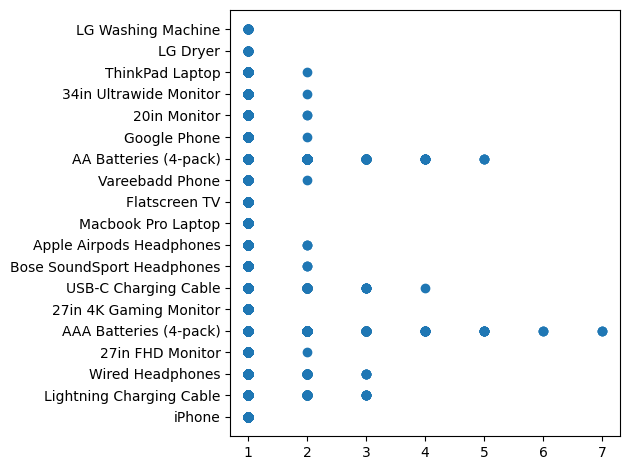

In [156]:
plt.scatter(data['Quantity Ordered'],data['Product'])
plt.tight_layout()

**Conclusion :** As we can see AAA batteries were sold the most.

2]Which city had highest number of sales?

In [158]:
def get_city(x):
  indexes = []
  a = 0
  for i in x:
      if i==',':
          indexes.append(a)
          a = a + 1
      else:
          a = a + 1
  city = x[indexes[0]+2:indexes[1]]
  return city

In [160]:
data['City'] = data['Purchase Address'].apply(get_city)

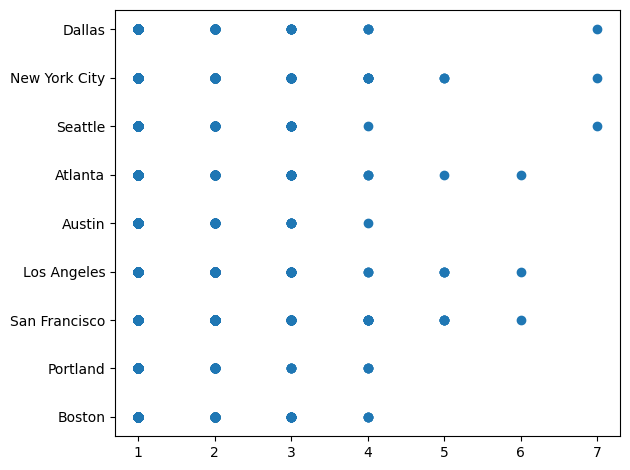

In [169]:
plt.scatter(data['Quantity Ordered'],data['City'])
plt.tight_layout()

**Conclusion :** Dallas, New york city and seattle are the cities with most the sells.